# 06 - Analysis

## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import time
import eli5

import joblib
import json
import pickle

In [4]:
import sys
sys.path.append('../')

import src

In [5]:
plt.style.use('fivethirtyeight')
pd.set_option('precision', 4)

## Load model

In [39]:
with open('../deploy/columns.json') as fh:
    columns = json.load(fh)

with open('../deploy/dtypes.pickle', 'rb') as fh:
    dtypes = pickle.load(fh)

pipeline = joblib.load('../models/pipeline.pickle')

## Load database data

In [7]:
df_heroku = src.loader.load_heroku_csv(columns, dtypes)

In [8]:
df_heroku.shape

(3999, 13)

In [9]:
df_heroku_2 = src.loader.load_second_heroku_csv(columns, dtypes)

In [10]:
df_heroku_2.head(1)

,type,date,operation,lat,long,sex,age,ethnicity_officer,legislation,search_target,station,predicted_outcome,success
observation_id,,,,,,,,,,,,,
96a49b7e-6b34-44fe-a07c-ac9112cebc49,Person search,2020-07-05 00:01:00+00:00,False,NaN,NaN,Male,25-34,Mixed,Misuse of Drugs Act 1971 (section 23),Controlled drugs,nottinghamshire,True,<NA>


In [11]:
df_heroku_2.shape

(3902, 13)

In [12]:
df_customer =  pd.read_csv('../data/X_test_1.csv')\
                    .set_index('observation_id')\
                    .drop(columns=['Self-defined ethnicity'])
df_customer.columns = columns
df_customer = df_customer.astype(dtypes)
df_customer['predicted_outcome'] = src.evaluate.authorise_search(pipeline, df_customer)
df_customer = df_customer.join(pd.read_csv('../data/y_test_1.csv')\
                                  .set_index('observation_id')\
                                  .rename(columns={'0': 'success'}))

In [13]:
df_customer.head(1)

,type,date,operation,lat,long,sex,age,ethnicity_officer,legislation,search_target,station,predicted_outcome,success
observation_id,,,,,,,,,,,,,
3d931c84-94d3-4a14-869c-b10fef26e9ad,Person search,2020-01-01 00:56:00+00:00,False,NaN,NaN,Male,18-24,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,nottinghamshire,True,False


In [14]:
df_train = pd.read_pickle('../data/training.pickle')

In [15]:
df_train.head(1)

,type,date,operation,lat,long,sex,age,ethnicity_self,ethnicity_officer,legislation,search_target,outcome,found_target,stripped,station,offense,success
observation_id,,,,,,,,,,,,,,,,,
d62c9e35-6293-45fc-aab6-706bdac1601e,Person search,2017-12-01 00:00:00+00:00,False,50.9234,-0.4611,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,False,False,sussex,True,False


In [16]:
df_train[df_train.station!='metropolitan'].shape

(309317, 17)

## Visualise datasets

In [17]:
eli5.explain_weights(pipeline.named_steps['clf'], top=None)#, feature_names=numeric_features_list)

Weight?,Feature
+4.882,x92
+0.921,x43
+0.871,x33
+0.649,x45
+0.571,x26
+0.315,x27
+0.273,x48
+0.254,x51
+0.252,x19
+0.243,x57


### Stations

In [18]:
df_stations = df_train.station.value_counts().rename('Training data')\
                    .to_frame()\
                    .join(df_customer.station.value_counts().rename('Test set 1'))\
                    .join(df_heroku_2.station.value_counts().rename('Test set 2'))

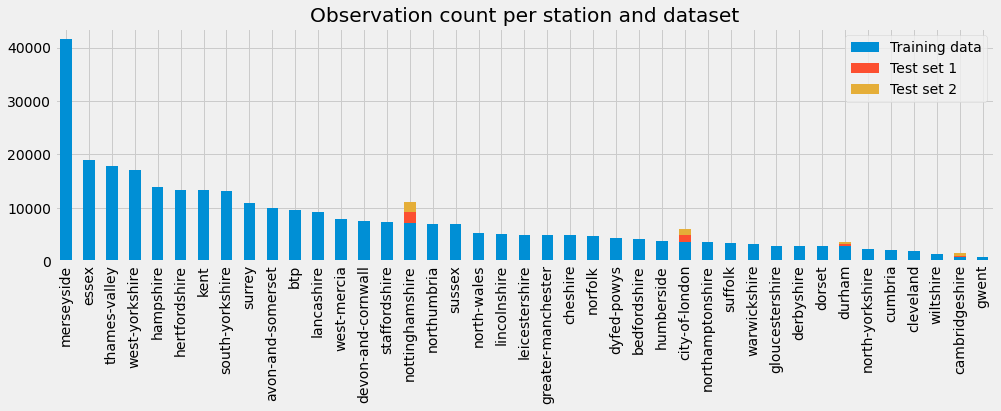

In [19]:
src.plots.make_station_barplot(df_stations)

In [20]:
df_stations

,Training data,Test set 1,Test set 2
metropolitan,351294,0,0
merseyside,41597,0,0
essex,19039,0,0
thames-valley,17898,0,0
west-yorkshire,17144,0,0
hampshire,13963,0,0
hertfordshire,13328,0,0
kent,13309,0,0
south-yorkshire,13165,0,0
surrey,10972,0,0


### Distributions

In [21]:
supplied_columns = ['type', 'date', 'operation', 'lat', 'long', 'sex', 'age', 'ethnicity_officer', 'legislation', 'search_target', 'station']
X_0 = df_train[supplied_columns]
X_1 = df_customer[supplied_columns]
X_2 = df_heroku_2[supplied_columns]
X_3 = X_0[X_0.station.isin(['nottinghamshire', 'city-of-london', 'durham', 'cambridgeshire'])]

In [22]:
col = 'search_target'
counts = (X_0[col].value_counts()/len(X_0))\
                    .rename('Training data')\
                    .to_frame()\
                    .join((X_1[col].value_counts()/len(X_1)).rename('Test set 1'))\
                    .join((X_2[col].value_counts()/len(X_2)).rename('Test set 2'))\
                    .join((X_3[col].value_counts()/len(X_3)).rename('Training data (same stations)'))
counts.index = counts.index.add_categories(['NA'])
counts.loc['NA',:] = [X[col].isna().sum()/len(X) for X in [X_0, X_1, X_2, X_3]]
counts

,Training data,Test set 1,Test set 2,Training data (same stations)
Controlled drugs,6.0379e-01,0.6703,0.6909,0.6501
Offensive weapons,1.5456e-01,0.0960,0.0928,0.1113
Stolen goods,1.0238e-01,0.0907,0.0700,0.0902
Article for use in theft,4.6678e-02,0.1225,0.1215,0.1205
Evidence of offences under the Act,3.0140e-02,0.0073,0.0062,0.0065
Anything to threaten or harm anyone,2.9915e-02,0.0000,0.0000,0.0027
Articles for use in criminal damage,1.6742e-02,0.0070,0.0095,0.0068
Firearms,8.2938e-03,0.0040,0.0033,0.0078
Fireworks,4.4625e-03,0.0003,0.0036,0.0017
Psychoactive substances,2.5749e-03,0.0000,0.0000,0.0006


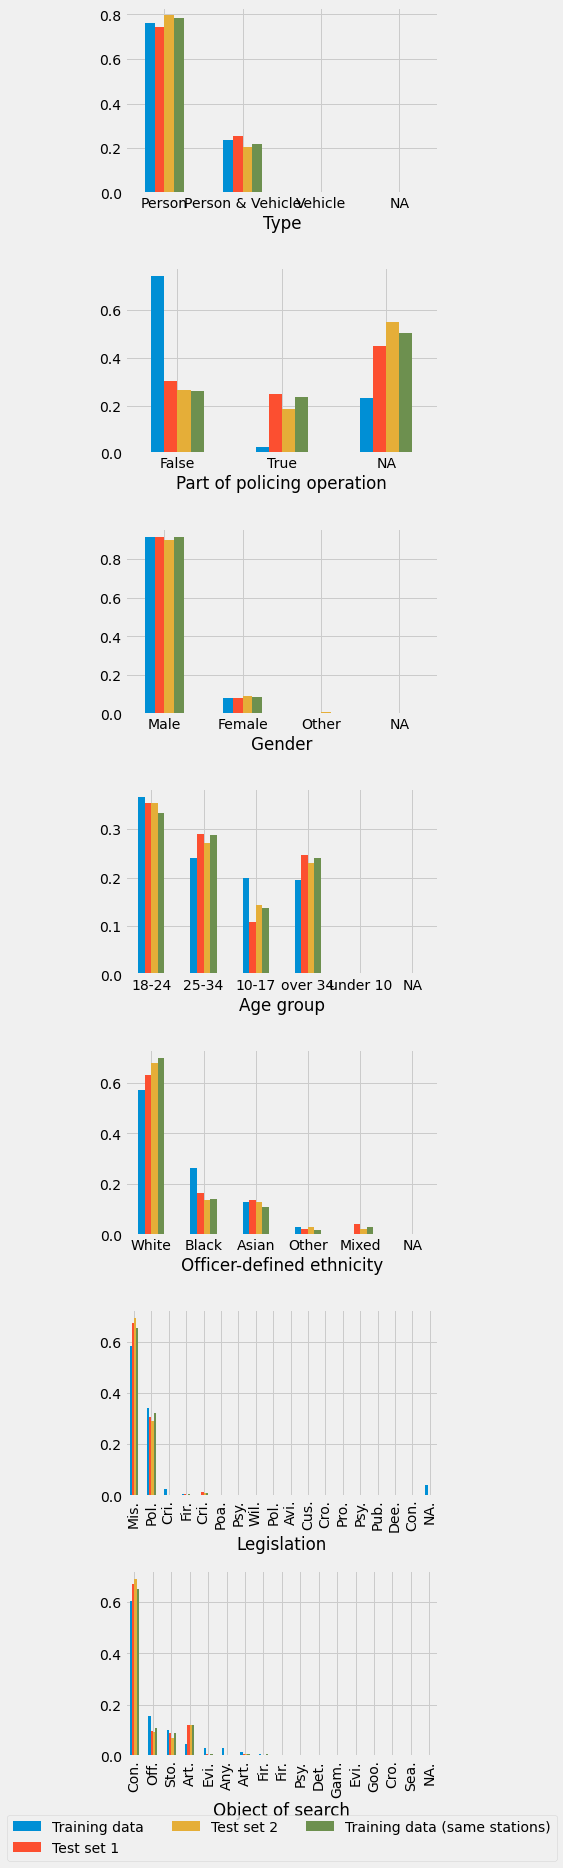

In [23]:
src.plots.make_distribution_plots(X_0, X_1, X_2, X_3)

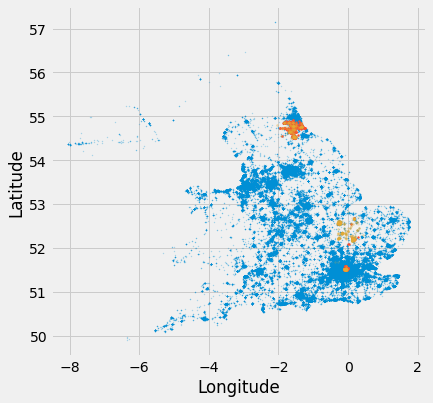

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(x=X_0.long, y=X_0.lat, label='Training data', s=1, alpha=0.2)
ax.scatter(x=X_1.long, y=X_1.lat, label='Test set 1', s=3, alpha=1)
ax.scatter(x=X_2.long, y=X_2.lat, label='Test set 2', s=3, alpha=0.2)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

fig.savefig('../reports/figures/location_comparison.jpg', dpi=300, bbox_inches='tight')

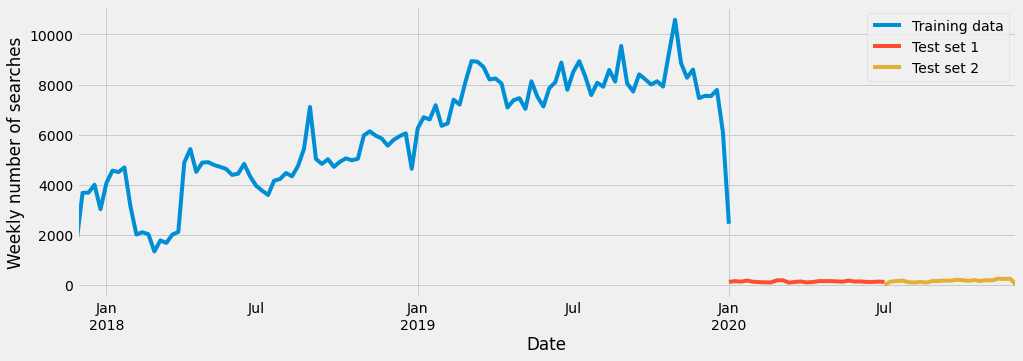

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

date_counts = X_0[['type', 'date']]\
                        .set_index('date')\
                        .resample('W')\
                        .count()\
                        .rename(columns={'type': 'Training data'})\
                    .merge(X_1[['type', 'date']]\
                               .set_index('date')\
                               .resample('W')\
                               .count()\
                               .rename(columns={'type': 'Test set 1'}),\
                            how='outer', left_index=True, right_index=True)\
                    .merge(X_2[['type', 'date']]\
                               .set_index('date')\
                               .resample('W')\
                               .count()\
                               .rename(columns={'type': 'Test set 2'}),\
                            how='outer', left_index=True, right_index=True)
date_counts.plot(ax=ax)
ax.legend(loc='upper right')
ax.set_ylabel('Weekly number of searches')
ax.set_xlabel('Date')

fig.savefig('../reports/figures/date_comparison.jpg', dpi=300, bbox_inches='tight')

## Analysis

### Data Profile

In [26]:
profile = pp.ProfileReport(df_heroku_2, title='Test Data Profiling Report', explorative=False, minimal=False, pool_size=0, progress_bar=True)
profile.to_file('../reports/profiling/test_profile.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

/home/rubelrennfix/.virtualenvs/capstone/lib/python3.6/site-packages/pandas_profiling/model/correlations.py:139: UserWarning: There was an attempt to calculate the phi_k correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"phi_k": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'values should be boolean numpy array. Use the 'pd.array' function instead')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]